## <center>Computer Science Intensive Course - MindX</center>
![](./assets/logo.png)
# <center>ĐÁP ÁN LAB 11 12 13</center>

# LAB 12. THUẬT TOÁN TÌM ĐƯỜNG (2)

### Bài 1. Kích Thước Tầng

In [6]:
# SOLUTION 1 - BFS
from collections import deque

def find_level_size(root, level):
    
    # special cases
    if level < 0 or level > 998:
        return 0
    if level == 0:
        return 1
    
    # init queue for BFS
    queue = deque()
    queue.append(root)
    
    # loop through each level until reached desired level
    for i in range(level):
        
        # get size of current level
        level_size = len(queue)
        if level_size == 0:  # reached end of tree
            return 0
        
        # traverse current level to push next level to queue
        for j in range(level_size):
            node = queue.popleft()
            if node.left != None:
                queue.append(node.left)
            if node.right != None:
                queue.append(node.right)
                
    return len(queue)

In [ ]:
# SOLUTION 2 - DFS
def dfs(node, current_level, level, count):
    if current_level == level:
        count[0] += 1
    else:
        if node.left != None:
            dfs(node.left, current_level+1, level, count)
        if node.right != None:
            dfs(node.right, current_level+1, level, count)


def find_level_size(root, level):
    
    # special cases
    if level < 0 or level > 998:
        return 0
    if level == 0:
        return 1
    
    # init queue for BFS
    count = [0]
    dfs(root, 0, level, count)
                
    return count[0]

### Bài 2. Thoát Khỏi Mê Cung

In [8]:
import matplotlib.pyplot as plt

plt.style.use('default')

def plot_maze_with_path(vertical, horizontal, path=None, before=None, fig_height=8):

    # init height & width
    height = len(vertical)
    width = len(vertical[0])
    
    # init figure
    fig = plt.figure(figsize=(fig_height*2, fig_height))
    fig.patch.set_visible(False)

    # draw maze borders
    for row in range(height):
        for col in range(width):
            if vertical[row][col]:
                plt.plot((col, col), (row, row+1), color='white')
            if horizontal[row][col]:
                plt.plot((col, col+1), (row, row), color='white')

    # draw surrounding borders on the right & bottom
    plt.plot((width, width), (0, height-1), color='white')
    plt.plot((0, width), (height, height), color='white')

    # styling the plot
    ax = plt.gca()
    ax.set_facecolor((0, 0, 0))
    ax.set_ylim(ax.get_ylim()[::-1])
    plt.xticks([])
    plt.yticks([])
    
    # add arrows
    plt.arrow(0, 0.5, 0.8, 0, width=0.07, length_includes_head=True, color='white')
    plt.arrow(width-0.8, height-0.5, 0.8, 0, width=0.07, length_includes_head=True, color='white')
    
    # plot path
    if path != None:
        last_step = (0, -0.5)
        for step in path + [(height-1, width-0.5)]:
            plt.plot((last_step[1]+0.5, step[1]+0.5), (last_step[0]+0.5, step[0]+0.5), color='cyan', linestyle='-.')
            last_step = step
            
    # plot every paths
    if before != None:
        for row in range(height):
            for col in range(width):
                if before[row][col] != None:
                    last_step = before[row][col]
                    plt.plot((last_step[1]+0.5, col+0.5), (last_step[0]+0.5, row+0.5), color='yellow', linestyle='-.')
    
    plt.show()

In [9]:
# SOLUTION

from IPython import display
import time

def bfs(vertical, horizontal):
    
    # init height & width
    height = len(vertical)
    width = len(vertical[0])
    
    # init visited array, vertex queue and `before` array to track the path
    queue = deque()
    visited = [[False]*width for _ in range(height)]
    before = [[None]*width for _ in range(height)]

    # add starting vertex
    queue.append((0, 0))
    visited[0][0] = True

    # while there remains vertices to visit...
    while len(queue) > 0:

        # visit next vertex in queue
        row, col = queue.popleft()

        # put adjacent vertices to queue and mark them as visited
        for i, j in [(row-1, col), (row, col+1), (row+1, col), (row, col-1)]:
            if i > -1 and i < height and j > -1 and j < width and not visited[i][j]:
                
                # check for wall between the current cell and the next cell
                has_wall = (i == row and vertical[i][max(j, col)]) \
                        or (j == col and horizontal[max(i, row)][j])
                if not has_wall:
                    queue.append((i, j))
                    visited[i][j] = True
                    before[i][j] = (row, col)
                    
                    # show the process of solving the maze - USED FOR DEMONSTRATION
                    time.sleep(0.2)
                    display.clear_output(wait=True)
                    plot_maze_with_path(vertical, horizontal, before=before)
                    
                    # exit found
                    if i == height-1 and j == width-1:
                        return before
                    
    return None


def find_path(vertical, horizontal):
    
    # traverse maze with BFS to retrieve the `before` dict to track the path
    before = bfs(vertical, horizontal)
    
    # init height & width
    height = len(vertical)
    width = len(vertical[0])
    
    # get the path tracking back `before`
    path = []
    vertex = (height-1, width-1)
    while vertex[0] != 0 or vertex[1] != 0:
        path.append(vertex)
        vertex = before[vertex[0]][vertex[1]]
    path.append((0, 0))
    
    # reverse the path
    path.reverse()
    return path

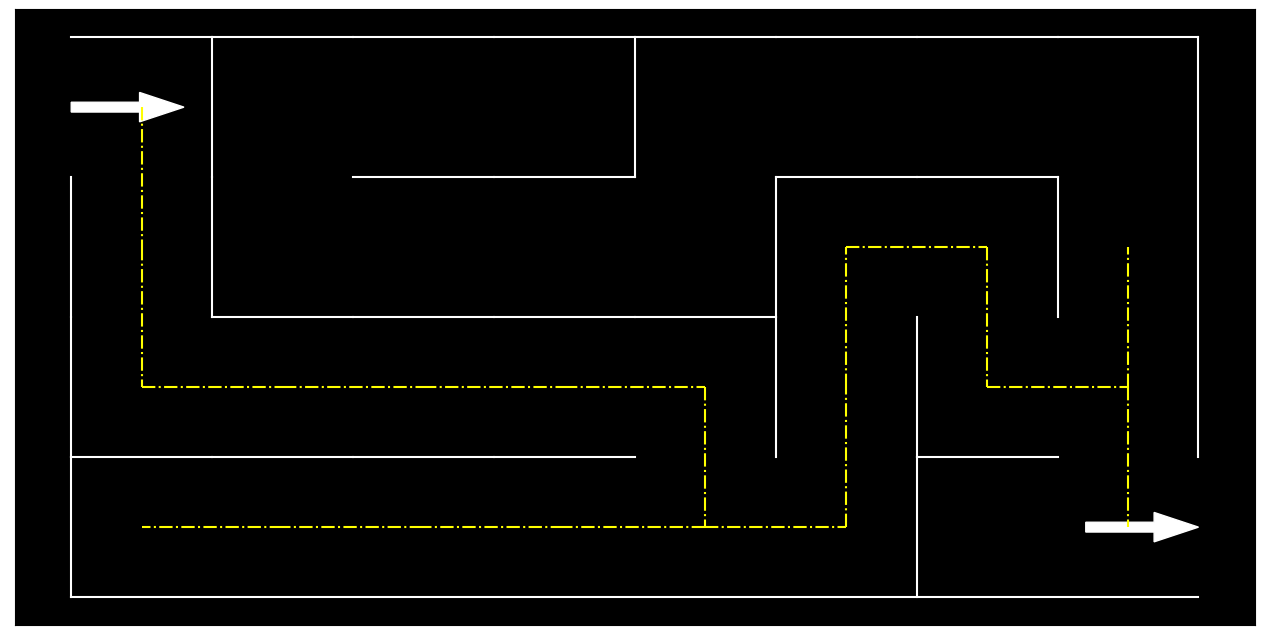

In [10]:
vertical = [
    [False, True, False, False, True, False, False, False],
    [True, True, False, False, False, True, False, True],
    [True, False, False, False, False, True, True, False],
    [True, False, False, False, False, False, True, False]]
horizontal = [
    [True, True, True, True, True, True, True, True],
    [False, False, True, True, False, True, True, False],
    [False, True, True, True, True, False, False, False],
    [True, True, True, True, False, False, True, False]]

path = find_path(vertical, horizontal)

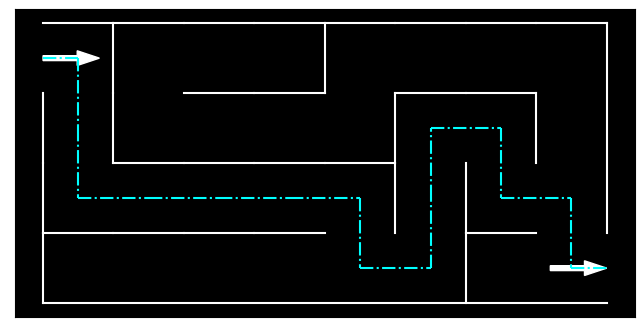

In [11]:
plot_maze_with_path(vertical, horizontal, path=path, fig_height=4)